In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression

## Explore Bitcoin Prices ##

In [3]:
df = pd.read_csv('bitcoin.csv')
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Apr 28, 2013",135.30,135.98,132.10,134.21,0,1488566728
1,"Apr 29, 2013",134.44,147.49,134.00,144.54,0,1603768865
2,"Apr 30, 2013",144.00,146.93,134.05,139.00,0,1542813125
3,"May 01, 2013",139.00,139.89,107.72,116.99,0,1298954594
4,"May 02, 2013",116.38,125.60,92.28,105.21,0,1168517495
...,...,...,...,...,...,...,...
3135,"Nov 27, 2021",53736.43,55329.26,53668.36,54815.08,30560857714,1035176249679
3136,"Nov 28, 2021",54813.02,57393.84,53576.74,57248.46,28116886357,1081180416262
3137,"Nov 29, 2021",57291.90,58872.88,56792.53,57806.57,32370840356,1091773828974
3138,"Nov 30, 2021",57830.11,59113.40,56057.28,57005.43,36708594618,1076689232562


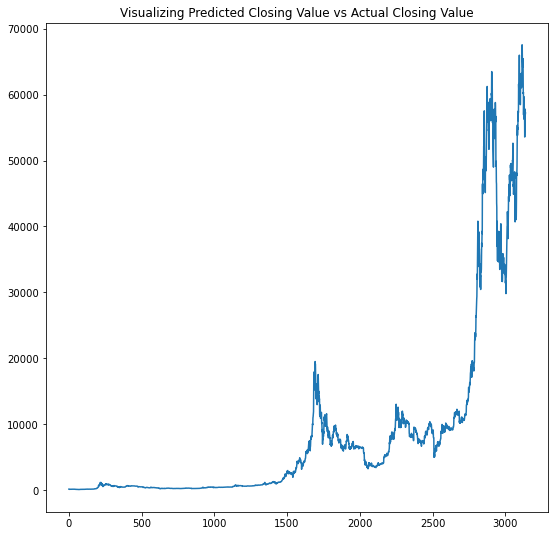

In [4]:
plt.figure(figsize=(9,9))
plt.plot(df.index, df['Close'])
plt.title('Visualizing Predicted Closing Value vs Actual Closing Value')
plt.show()

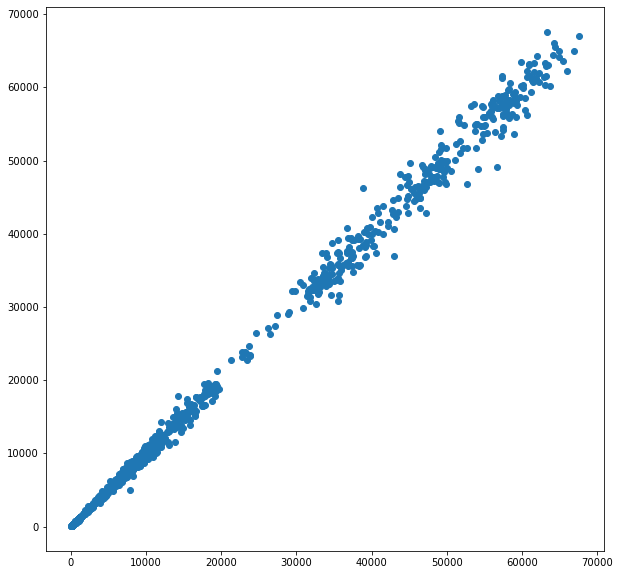

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(df['Open'], df['Close'])
plt.show()

In [6]:
X = df[['Open']]
y = df[['Close']]

X_train = X.iloc[:-30,:]
y_train = y.iloc[:-30,:]
X_test = X.iloc[-30:,:]
y_test = y.iloc[-30:,:]


In [7]:
xTi = []
for i in range(len(X_train)):
    xTi.append(i)




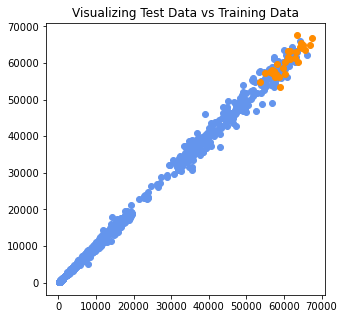

In [8]:
plt.figure(figsize=(5,5))
plt.scatter(X_train, y_train, color='cornflowerblue')
plt.scatter(X_test, y_test, color='darkorange')
plt.title('Visualizing Test Data vs Training Data')
plt.show()

In [9]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [10]:
m = model.coef_[0][0]
b = model.intercept_[0]
print(f'y = {m}x + {b}')

y = 1.0004412638212483x + 13.454248036470744


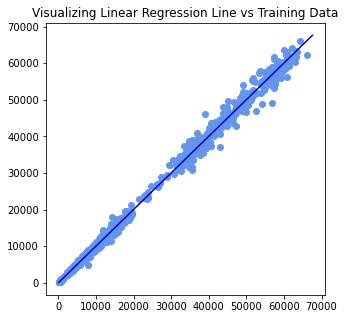

In [11]:
# PLOT OUR LINEAR REGRESSION VS TRAINING DATA
m = model.coef_[0][0]
b = model.intercept_[0]
x0 = min(X_train.min().values[0], X_test.min().values[0])
x1 = max(X_train.max().values[0], X_test.max().values[0])
y0 = m * x0 + b
y1 = m * x1 + b

plt.figure(figsize=(5,5))
plt.scatter(X_train, y_train, color='cornflowerblue')
plt.plot((x0, x1), (y0, y1), color='mediumblue')
plt.title('Visualizing Linear Regression Line vs Training Data')
plt.show()

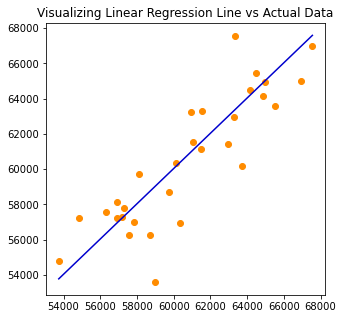

In [12]:
# ZOOM IN ON NEW DATA

x0 = X_test.min().values[0]
x1 = X_test.max().values[0]
y0 = m * x0 + b
y1 = m * x1 + b

plt.figure(figsize=(5,5))
plt.scatter(X_test, y_test, color='darkorange')
plt.plot((x0, x1), (y0, y1), color='mediumblue')
plt.title('Visualizing Linear Regression Line vs Actual Data')
plt.show()

In [13]:
# model.predict(X_test)
y_pred =pd.DataFrame(model.predict(X_test))
type(y_pred)


pandas.core.frame.DataFrame

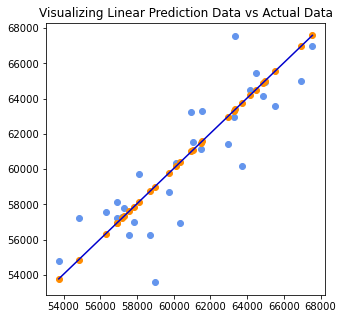

In [14]:
# PLOT PREDICTION VS ACTUAL INCLUDING OUR LINEAR REGRESSION LINE

plt.figure(figsize=(5,5))
plt.scatter(X_test, y_test, color='cornflowerblue')
plt.scatter(X_test, y_pred, color='darkorange')
plt.plot((x0, x1), (y0, y1), color='mediumblue')
plt.title('Visualizing Linear Prediction Data vs Actual Data')
plt.show()

In [15]:
i = y_pred
print(f"{i}")

               0
0   61003.605125
1   63295.696095
2   62983.028187
3   61500.654358
4   61109.271731
5   61595.536207
6   63385.475694
7   67593.001504
8   66996.338335
9   65021.017081
10  64906.056376
11  64199.884905
12  64497.266071
13  65563.656423
14  63762.772108
15  60179.611687
16  60400.228994
17  56934.690452
18  58154.178330
19  59770.321161
20  58746.209457
21  56342.859413
22  57604.705975
23  57204.099280
24  58999.761291
25  53773.596190
26  54850.661251
27  57330.635091
28  57869.082583
29  56946.535676


InvalidIndexError: (slice(None, None, None), None)

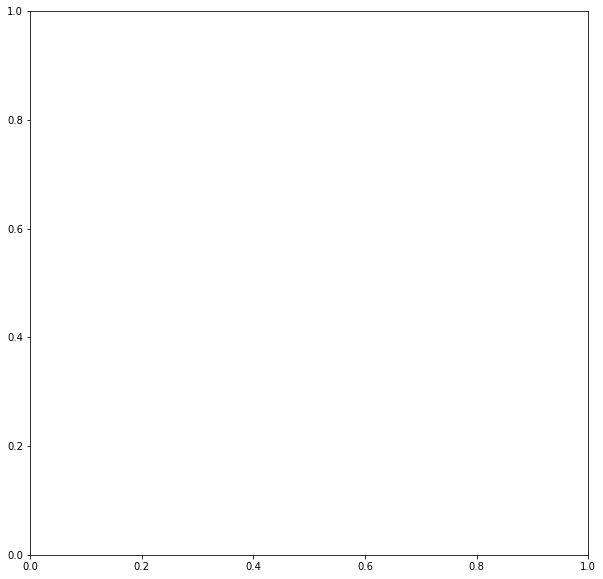

In [16]:
# NOW SWITCH BACK TO CLOSING VALUE OVER TIME

plt.figure(figsize=(10,10))
plt.plot(xTi, X_train, color='cornflowerblue')
plt.plot(y_pred.index, y_pred, color='mediumblue')
plt.plot(y_test.index, y_test, color='darkorange')
plt.title('Visualizing Predicted Closing Value vs Actual Closing Value')
plt.show()

In [ ]:
# NEED TO ZOOM IN ON PREDICTIONS

plt.figure(figsize=(10,10))
plt.plot(y_test.index, y_pred, color='mediumblue', label='Model Prediction')
plt.plot(y_test.index, y_test, color='darkorange', label='Actual Closing Value')
plt.title('Visualizing Linear Prediction Data vs Actual Data')
plt.legend()
plt.show()

In [ ]:
model.score(X_train, y_train) # R^2 score

## Exploring Housing Prices ##

In [55]:
from sklearn.model_selection import train_test_split
dk = pd.read_csv("housing_test.csv")
df = pd.read_csv('housing_dataset.csv')
df = df.dropna()
encoder1 = OrdinalEncoder()
encoder2 = OrdinalEncoder()
encoder1.fit(df[['ocean_proximity']])
encoder2.fit(dk[['ocean_proximity']])
df['ocean_proximity'] = encoder1.transform(df[['ocean_proximity']])
dk['ocean_proximity'] = encoder2.transform(dk[['ocean_proximity']])
df['ocean_proximity'].value_counts()
dk['ocean_proximity'].value_counts()

2.0    3
1.0    3
0.0    3
Name: ocean_proximity, dtype: int64

In [56]:
y = df["median_house_value"]
X = df.drop('median_house_value', axis='columns')
X

,house_id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,1,-122.23,37.88,41,880,129.0,322,126,8.3252,3.0
1,2,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3.0
2,3,-122.24,37.85,52,1467,190.0,496,177,7.2574,3.0
3,4,-122.25,37.85,52,1274,235.0,558,219,5.6431,3.0
4,5,-122.25,37.85,52,1627,280.0,565,259,3.8462,3.0
...,...,...,...,...,...,...,...,...,...,...
20626,20636,-121.09,39.48,25,1665,374.0,845,330,1.5603,1.0
20627,20637,-121.21,39.49,18,697,150.0,356,114,2.5568,1.0
20628,20638,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1.0
20629,20639,-121.32,39.43,18,1860,409.0,741,349,1.8672,1.0


In [60]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6, test_size=0.2)
model = LinearRegression()
model.fit(X, y)

y_pred = pd.DataFrame(model.predict(dk))

In [61]:
y_pred.to_csv("housing_preds")

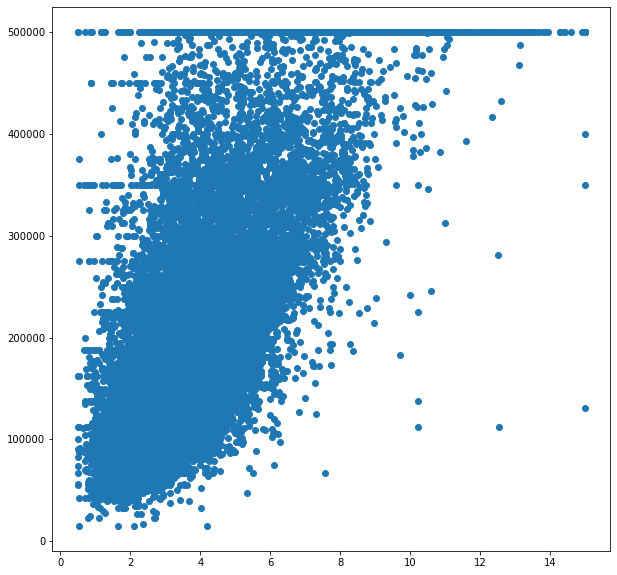

In [46]:
plt.figure(figsize=(10,10))
plt.scatter(df['median_income'], df['median_house_value'])
plt.show()

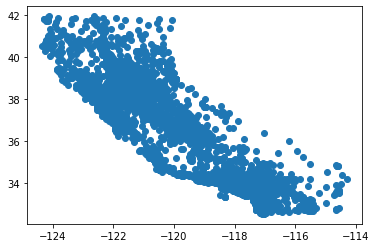

In [21]:
plt.scatter(df['longitude'], df['latitude'])
plt.show()

In [22]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9133
INLAND        6548
NEAR OCEAN    2658
NEAR BAY      2287
ISLAND           5
Name: ocean_proximity, dtype: int64

In [23]:
encoder = OrdinalEncoder()
encoder.fit(df[['ocean_proximity']])
df['location'] = encoder.transform(df[['ocean_proximity']])
df['location'].value_counts()

0.0    9133
1.0    6548
4.0    2658
3.0    2287
2.0       5
Name: location, dtype: int64

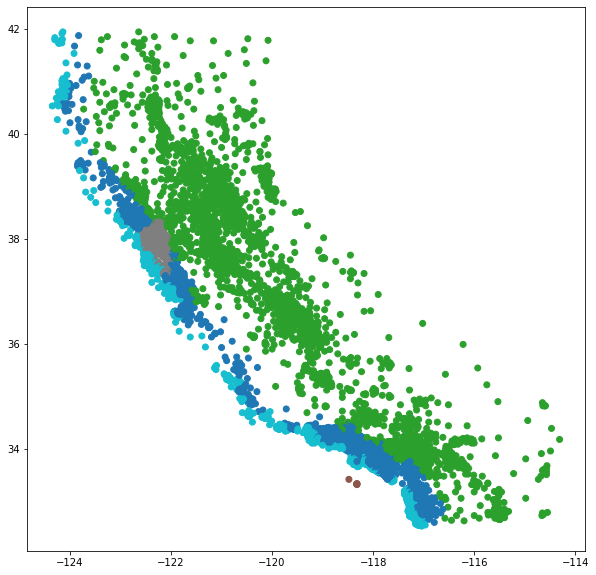

In [24]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10,10))
plt.scatter(df['longitude'], df['latitude'], c=df['location'], cmap='tab10')
plt.show()